# Web Scraping and Regular Expression (RegEx)

>From This Website **http://www.chakoteya.net/StarTrek/index.html** I had to extract how many times the **Places** and **Actors** appear in the episodes.

We import first the requests that goes to call a website, which through this library allows us to make a request to the ABI to access a site(info present in a server).

In this case I uploaded them directly because the site sometimes did not work.

1 - Read the text file and import it as a string.

In [1]:
from bs4 import BeautifulSoup #i used the beautifulsoup because the file 'episode101.txt' is writed in Html.

with open('episode101.txt', 'r') as f: 
    full_text = f.read()
soup = BeautifulSoup(full_text, 'html.parser') 

2 - Counting How many times a place appears.

In [2]:
places = [] #This an empty list where im going to put all places present in my episode.
places_app = {} # this is the dictionary where im going to put the places and the number of appears.
for tag in soup.tbody.select("b"): # where i check the content of my episode i find that the places are all in the tag <b> so i use beautifulsoup to select them and saving them on our list places.
    places.append(tag.text.replace("[" , "").replace("]", ""))

In [3]:
# Counting appearance.
for l in places:
    if l in places_app:
        places_app[l]+= 1
    else:
        places_app[l] = 1
places_app

{'Bridge': 22,
 'Battle Bridge': 3,
 'Courtroom': 1,
 "Zorn's office": 7,
 'Market place': 2,
 'Transporter room': 2,
 'Corridor': 4,
 'Turbolift': 1,
 'Battle bridge': 2,
 'Battle ready room': 1,
 'Ready room': 2,
 'Sickbay': 3,
 'Forest': 1,
 'Passageway': 6,
 'Marketplace': 3,
 'Bandi city': 5,
 "Crusher's office": 1,
 'Alien vessel': 3}

3 - Counting How many times Actors.

In [4]:
# Here its a litlle different, because we have all name of Actors inside on tag, so we can't extract them like we did with places.
# so here i decide first to extract al of them, then to use the Regular Expression (RegEx) to find all Actors.
list_actors = []
for i in soup.tbody.select('p'): 
    list_actors.append(i.text)
str1 = str(list_actors)
newstr = str1.replace("[", " ").replace("]", " ") 

In [5]:
import re 
Actors = []
pattern = re.compile(r'([A-Z]+)')
for person in re.findall(pattern, newstr):
    if len(person) > 1 or person== 'Q':
        Actors.append(person)
    
print(Actors)

['PICARD', 'DATA', 'PICARD', 'TROI', 'PICARD', 'DATA', 'PICARD', 'DATA', 'PICARD', 'DATA', 'PICARD', 'DATA', 'TROI', 'TORRES', 'DATA', 'TROI', 'PICARD', 'WORF', 'PICARD', 'TORRES', 'Q', 'PICARD', 'Q', 'Q', 'Q', 'PICARD', 'TROI', 'PICARD', 'Q', 'Q', 'Q', 'US', 'Q', 'PICARD', 'Q', 'PICARD', 'Q', 'PICARD', 'Q', 'Q', 'WORF', 'Q', 'WORF', 'TASHA', 'PICARD', 'Q', 'PICARD', 'Q', 'PICARD', 'Q', 'WORF', 'TASHA', 'PICARD', 'TROI', 'PICARD', 'WORF', 'PICARD', 'DATA', 'PICARD', 'DATA', 'PICARD', 'WORF', 'TROI', 'PICARD', 'WORF', 'DATA', 'PICARD', 'TASHA', 'WORF', 'PICARD', 'TROI', 'PICARD', 'TROI', 'WORF', 'TASHA', 'PICARD', 'DATA', 'PICARD', 'DATA', 'TASHA', 'PICARD', 'DATA', 'PICARD', 'TASHA', 'TASHA', 'WORF', 'DATA', 'TASHA', 'PICARD', 'WORF', 'PICARD', 'WORF', 'PICARD', 'PICARD', 'TASHA', 'TROI', 'PICARD', 'PICARD', 'OC', 'WORF', 'TASHA', 'PICARD', 'DATA', 'DATA', 'TASHA', 'PICARD', 'DATA', 'PICARD', 'TROI', 'TASHA', 'PICARD', 'TASHA', 'BRIEN', 'PICARD', 'TROI', 'Q', 'BAILIFF', 'DATA', 'PICARD

In [6]:
# Counting how many times he spoke
dicto = {}
for n in Actors: 
    if n in dicto:
        dicto[n] += 1
    else:
        dicto[n] = 1
dicto

{'PICARD': 184,
 'DATA': 60,
 'TROI': 45,
 'TORRES': 2,
 'WORF': 31,
 'Q': 82,
 'US': 1,
 'TASHA': 34,
 'OC': 27,
 'BRIEN': 3,
 'BAILIFF': 8,
 'SOLDIER': 2,
 'JUDGE': 2,
 'USS': 2,
 'ZORN': 41,
 'RIKER': 116,
 'WESLEY': 20,
 'CRUSHER': 35,
 'LAFORGE': 15,
 'WT': 1,
 'EM': 1,
 'MCCOY': 10,
 'ENSIGN': 3,
 'COMPUTER': 3,
 'SECURITY': 4,
 'ID': 2,
 'CMO': 1,
 'CREW': 1}

>VISUALIZATION 

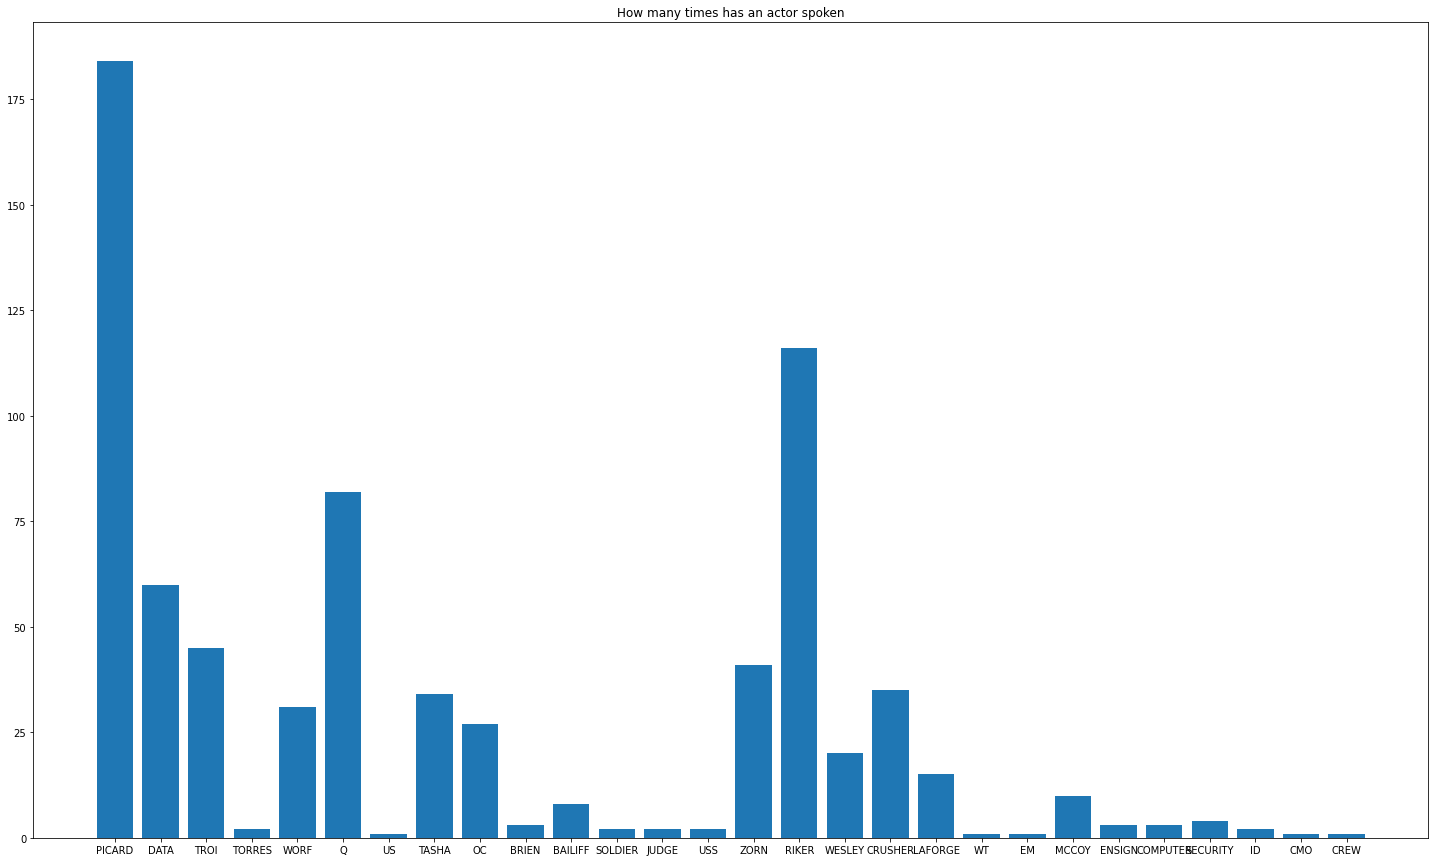

In [21]:
import matplotlib.pyplot as plt

persons_key = list(dicto.keys())
persons_value = list(dicto.values())
fig = plt.figure(figsize=(25, 15))
plt.bar(persons_key,persons_value)
plt.title('How many times has an actor spoken')
plt.show()

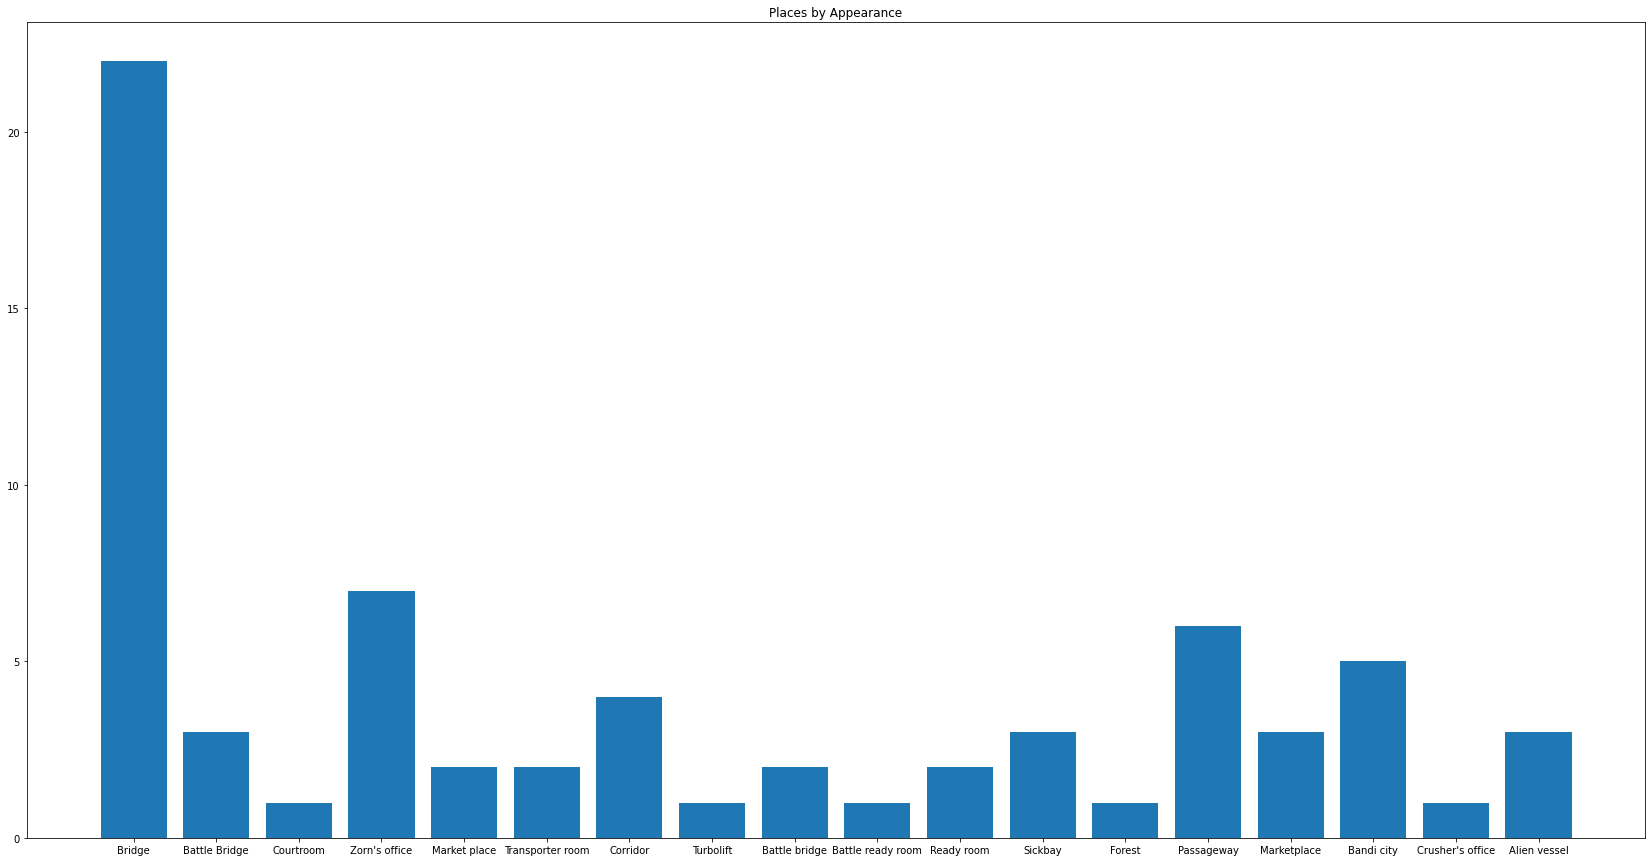

In [9]:
places_key= list(places_app.keys())
places_values = list(places_app.values())
fig = plt.figure(figsize= (29, 15))
plt.bar(places_key, places_values)
plt.title('Places by Appearance')
plt.show()